In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
import seaborn as sns
from tensorflow.keras import models, layers
from keras.utils import img_to_array, array_to_img, to_categorical
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import Adam

In [ ]:
early_blight='/content/drive/MyDrive/Colab Notebooks/PlantVillage/Potato___Early_blight'
late_blight='/content/drive/MyDrive/Colab Notebooks/PlantVillage/Potato___Late_blight'
healthy='/content/drive/MyDrive/Colab Notebooks/PlantVillage/Potato___healthy'

In [ ]:
IMAGE_SIZE=256

In [ ]:
print(len(os.listdir(early_blight)))
print(len(os.listdir(late_blight)))
print(len(os.listdir(healthy)))


1000
1000
152


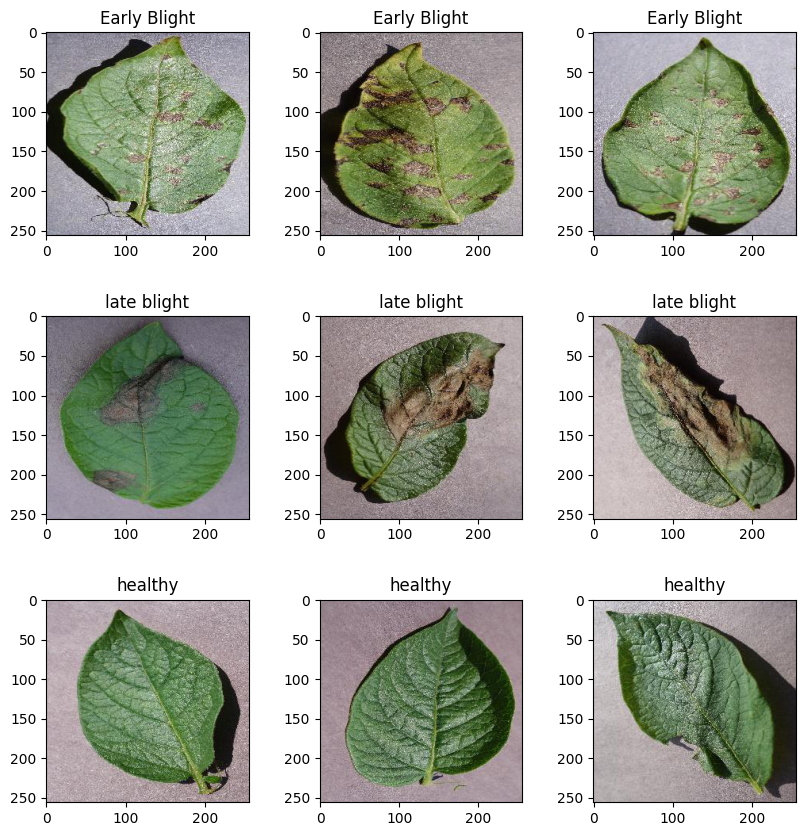

In [ ]:
fig,axes=plt.subplots(3,3,figsize=(10,10))
plt.subplots_adjust(hspace=0.4)
axex=axes.ravel()
m=0
for i in range(3):
  image=plt.imread(early_blight + '/' + random.choice(os.listdir(early_blight)) )
  axex[m].imshow(image)
  axex[m].set_title('Early Blight')
  m+=1
for i in range(3):
  image=plt.imread(late_blight + '/' + random.choice(os.listdir(late_blight)) )
  axex[m].imshow(image)
  axex[m].set_title('late blight')
  m+=1
for i in range(3):
  image=plt.imread(healthy + '/' + random.choice(os.listdir(healthy)) )
  axex[m].imshow(image)
  axex[m].set_title('healthy')
  m+=1 

In [ ]:
def convert_image_array(image_path):
  try:
    image=cv2.imread(image_path)
    if image is not None:
      image=cv2.resize(image,(IMAGE_SIZE,IMAGE_SIZE))
      hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
      mask1 = cv2.inRange(hsv, (25, 52, 72), (102, 255, 255))
      result = cv2.bitwise_not(image,image, mask= mask1)
      return(img_to_array(result))
    else:
      return np.array([])
  except Exception as e:
    print("Error",e)


In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from matplotlib import colors
# pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
# norm = colors.Normalize(vmin=-1.,vmax=1.)
# norm.autoscale(pixel_colors)
# pixel_colors = norm(pixel_colors).tolist()
# h, s, v = cv2.split(hsv)
# fig = plt.figure()
# axis = fig.add_subplot(1, 1, 1, projection="3d")

# axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
# axis.set_xlabel("Hue")
# axis.set_ylabel("Saturation")
# axis.set_zlabel("Value")
# plt.show()
# cv2.imshow('try Image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
path='/content/drive/MyDrive/Colab_Notebooks/PlantVillage'
root_dir=os.listdir(path)
print(root_dir)

['Potato___healthy', 'Potato___Early_blight', 'Potato___Late_blight']


In [ ]:
image_list,image_label=[],[]
temp=-1
for dir in root_dir:
  new_list=os.listdir(path + '/' + dir)
  temp+=1
  print(len(new_list))
  for i in new_list:
    img_path=path + '/' + dir + '/' + i
    image_list.append(convert_image_array(img_path))
    image_label.append(temp)
print(image_label)

152
1000
1000
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
image_list[100]

array([[[220., 215., 217.],
        [218., 213., 215.],
        [219., 214., 216.],
        ...,
        [142., 136., 147.],
        [144., 138., 149.],
        [147., 141., 152.]],

       [[214., 209., 211.],
        [217., 212., 214.],
        [216., 211., 213.],
        ...,
        [133., 127., 138.],
        [137., 131., 142.],
        [145., 139., 150.]],

       [[215., 210., 212.],
        [220., 215., 217.],
        [212., 207., 209.],
        ...,
        [124., 118., 129.],
        [129., 123., 134.],
        [140., 134., 145.]],

       ...,

       [[174., 174., 180.],
        [174., 174., 180.],
        [173., 173., 179.],
        ...,
        [109., 107., 119.],
        [113., 111., 123.],
        [103., 101., 113.]],

       [[172., 172., 178.],
        [172., 172., 178.],
        [172., 172., 178.],
        ...,
        [123., 121., 133.],
        [127., 125., 137.],
        [122., 120., 132.]],

       [[175., 175., 181.],
        [175., 175., 181.],
        [176., 1

In [ ]:
norm_image_list=np.array(image_list,dtype=np.float16)/255.0

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(norm_image_list, image_label, random_state = 0)



In [ ]:
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [ ]:
from keras.models import Sequential
import tensorflow as tf

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 3

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    epochs=30,
)

Epoch 1/30
41/41 [==============================] - 20s 121ms/step - loss: 0.9200 - accuracy: 0.4802 - val_loss: 0.9249 - val_accuracy: 0.4396
Epoch 2/30
41/41 [==============================] - 3s 66ms/step - loss: 0.8081 - accuracy: 0.5833 - val_loss: 1.0235 - val_accuracy: 0.5882
Epoch 3/30
41/41 [==============================] - 3s 67ms/step - loss: 0.6052 - accuracy: 0.7583 - val_loss: 0.5967 - val_accuracy: 0.7492
Epoch 4/30
41/41 [==============================] - 3s 76ms/step - loss: 0.4680 - accuracy: 0.8125 - val_loss: 0.5007 - val_accuracy: 0.7957
Epoch 5/30
41/41 [==============================] - 3s 71ms/step - loss: 0.4301 - accuracy: 0.8056 - val_loss: 0.4177 - val_accuracy: 0.8483
Epoch 6/30
41/41 [==============================] - 3s 68ms/step - loss: 0.3291 - accuracy: 0.8652 - val_loss: 0.2755 - val_accuracy: 0.8731
Epoch 7/30
41/41 [==============================] - 3s 68ms/step - loss: 0.3006 - accuracy: 0.8807 - val_loss: 0.2224 - val_accuracy: 0.9443
Epoch 8/30


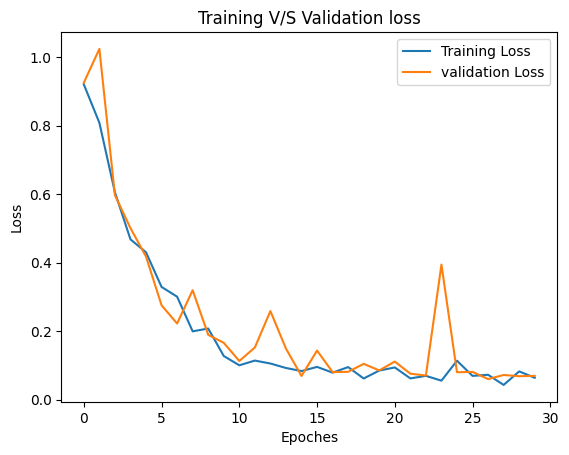

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title("Training V/S Validation loss")
plt.legend()


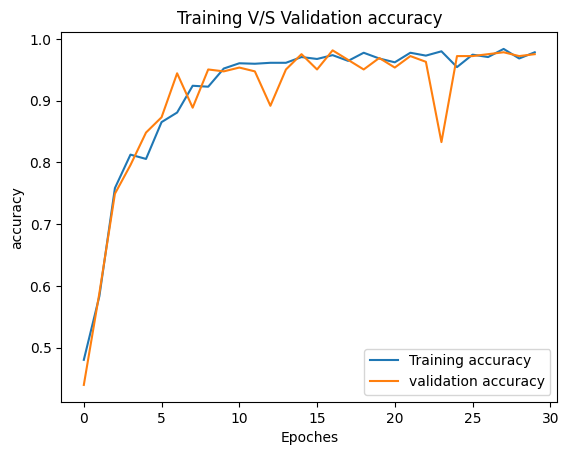

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoches')
plt.ylabel('accuracy')
plt.title("Training V/S Validation accuracy")
plt.legend()

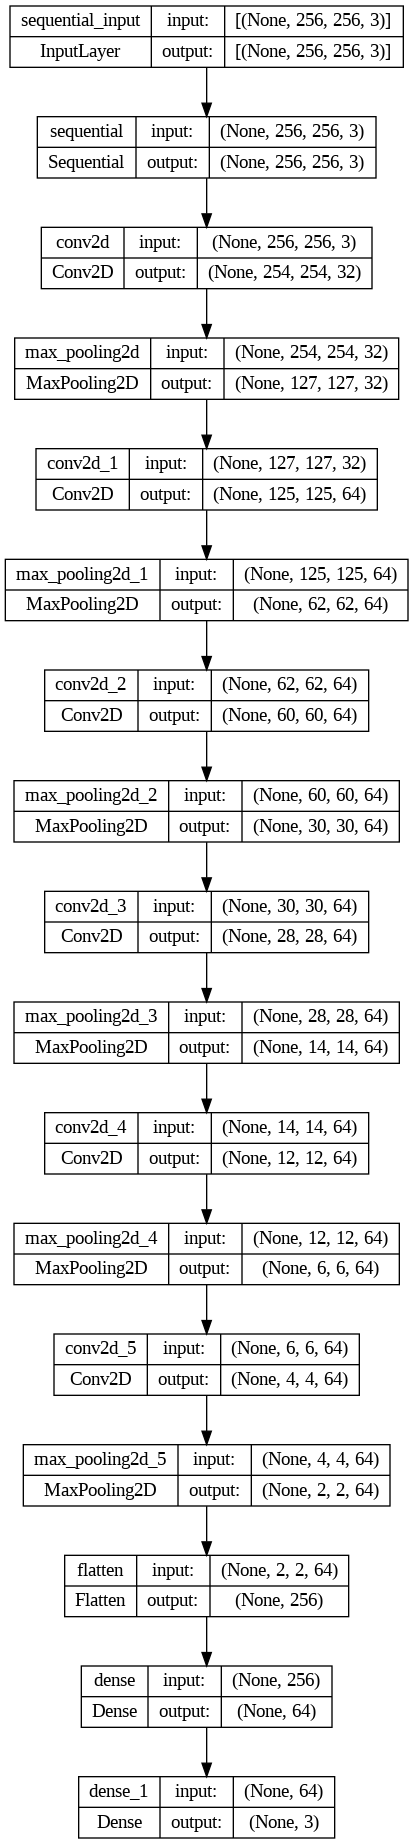

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.evaluate(xtest,ytest)

17/17 [==============================] - 1s 55ms/step - loss: 0.0888 - accuracy: 0.9758


[0.08880151808261871, 0.975836455821991]

In [ ]:
y_pred=model.predict(xtest)


17/17 [==============================] - 0s 20ms/step


In [ ]:
ypred=np.argmax(y_pred,axis=1)
yactual=np.argmax(ytest,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(yactual, ypred)
matrix

array([[ 37,   0,   2],
       [  1, 255,   5],
       [  5,   0, 233]])


# Test for image

In [ ]:
xtest[0]


array([[[0.447 , 0.396 , 0.4824],
        [0.4353, 0.3843, 0.4707],
        [0.4275, 0.3765, 0.4626],
        ...,
        [0.639 , 0.5728, 0.608 ],
        [0.6   , 0.533 , 0.569 ],
        [0.702 , 0.6353, 0.6704]],

       [[0.4197, 0.3687, 0.4548],
        [0.4197, 0.3687, 0.4548],
        [0.4158, 0.3647, 0.451 ],
        ...,
        [0.6943, 0.6274, 0.6626],
        [0.651 , 0.5845, 0.6196],
        [0.596 , 0.5293, 0.565 ]],

       [[0.396 , 0.3452, 0.4314],
        [0.4158, 0.3647, 0.451 ],
        [0.4314, 0.3804, 0.4666],
        ...,
        [0.6626, 0.596 , 0.6313],
        [0.6665, 0.6   , 0.6353],
        [0.6235, 0.5566, 0.5923]],

       ...,

       [[0.4158, 0.341 , 0.4158],
        [0.4038, 0.3293, 0.4038],
        [0.4314, 0.357 , 0.4314],
        ...,
        [0.6704, 0.5884, 0.6   ],
        [0.757 , 0.6743, 0.686 ],
        [0.643 , 0.5605, 0.5728]],

       [[0.4626, 0.3882, 0.4626],
        [0.4314, 0.357 , 0.4314],
        [0.4119, 0.3372, 0.4119],
        .

In [ ]:
path='/content/21.jpg'


a=convert_image_array(path)
a=a.reshape(-1,256,256,3)
norm_image_list=np.array(a,dtype=np.float16)/255.0
b=model.predict(norm_image_list) 
c=np.argmax(b,axis=1)
# plt.imshow(img)
classes=["Healthy Leaf","Early Blight Disease","Late Blight Disease"]
if c==0:
  print(classes[0])
elif c==1:
  print(classes[1])
elif c==2:
  print(classes[2])
else:
  print("!!Error!!")
print(c)



1/1 [==============================] - 0s 21ms/step
Late Blight Disease
[2]


Text(0.5, 1.0, 'Without Diseased Part')

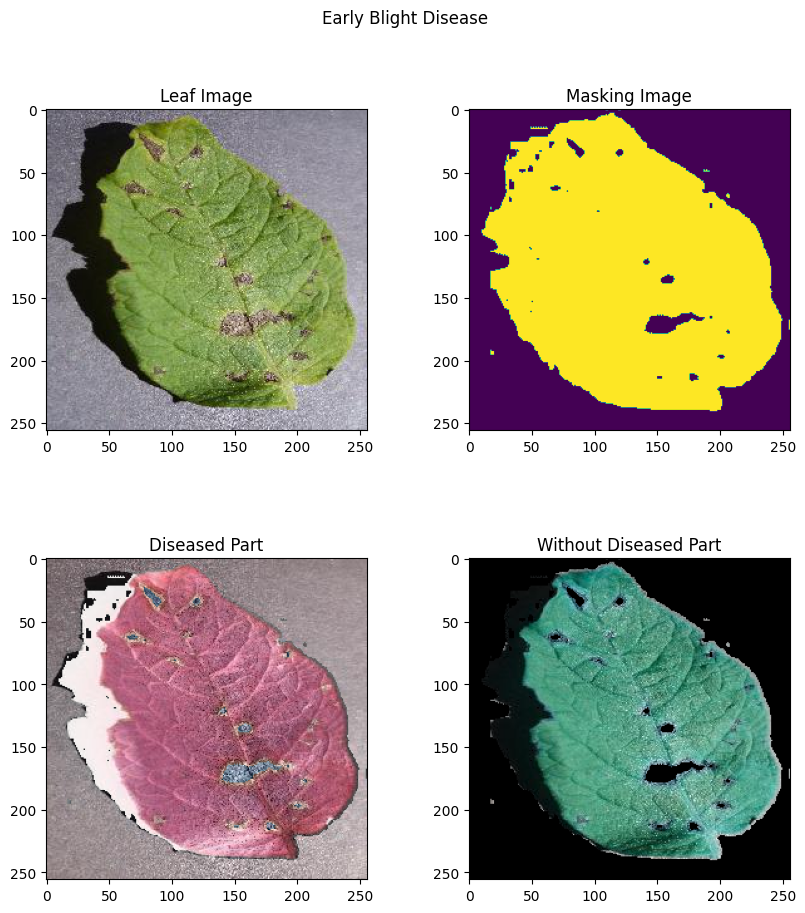

In [ ]:
img=cv2.imread(path)
img=cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask1 = cv2.inRange(hsv, (20, 0, 0), (110, 255, 255))
result = cv2.bitwise_and(img,img, mask= mask1)
result1 = cv2.bitwise_not(img,img, mask= mask1)


figure, axis = plt.subplots(2, 2,figsize=(10,10))
plt.subplots_adjust(hspace=0.4)
figure.suptitle(classes[c[0]])
i=plt.imread(path)

axis[0, 0].imshow(i)
axis[0, 0].set_title("Leaf Image")
axis[0, 1].imshow(mask1)
axis[0, 1].set_title("Masking Image")
axis[1, 0].imshow(result1)
axis[1, 0].set_title("Diseased Part")
axis[1, 1].imshow(result)
axis[1, 1].set_title("Without Diseased Part")

<Axes: >

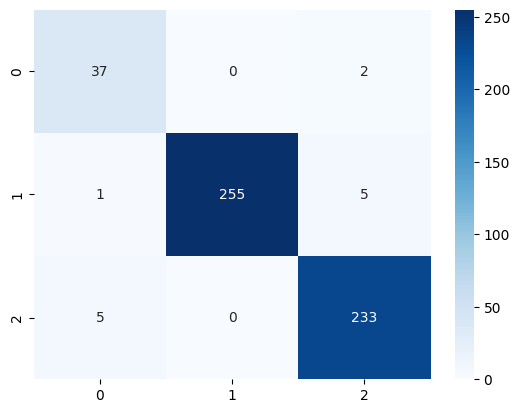

In [ ]:
import seaborn as sns
sns.heatmap(matrix, annot=True,cmap='Blues', fmt='g')